In [ ]:
# Run this cell to mount your drive to this notebook in order to read the datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [ ]:
# Put the folder path where the datasets are located
PATH = "/content/drive/My Drive/445Datasets/"

In [ ]:
# Read the train and test set with read_csv() method of pandas
train = pd.read_csv(PATH + "train.csv")
test = pd.read_csv(PATH + "test.csv")

In [ ]:
train.head(10)

,Unnamed: 0,text,label
0,0,I came here and left a review before but last ...,1
1,1,Had a very nice first visit here. The owner Te...,4
2,2,This is a gorgeous and very clean hotel. We h...,4
3,3,The gym is dirty. I have given up. Locker ro...,1
4,4,"The food here is delicious, fast, and consiste...",5
5,5,We stopped in on a Sunday evening. I was surpr...,1
6,6,Porcini is our favorite local dinner place and...,5
7,7,Unacceptable wait for food. After ordering and...,1
8,8,Honestly came here with the folks and was take...,5
9,9,I came here after hearing multiple different p...,4


### Preprocess Dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopWordsEnglish = set(stopwords.words('english'))

stopWordsEnglish

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Define a function to perform preprocessing. This function can perform things like lowercasing, stemming, removing stopwords, etc.

def preprocess(text: str):
  word = ""
  string = ""
  stopWordsEnglish = set(stopwords.words('english'))
  count = 0

  for ch in text:
    if ch != " ":
      if (ch>= "a" and ch<="z") or (ch>="A" and ch <="Z"):
        word += str(ch)
    else:

      word = word.lower()
      if word not in stopWordsEnglish: #if a stopword, remove it
        word = PorterStemmer().stem(word)
        if count != 0:
          string += " "
        else:
          count = 1
        string += word
      word = ""

  string += " " + word
 

  return string

In [ ]:
# Apply your preprocessing function to your text fields.

train = train.dropna(how="any")


test = test.dropna(how="any")



train.text = train.text.apply(preprocess)
test.text = test.text.apply(preprocess)

train.shape, test.shape

((18000, 3), (2000, 3))

In [ ]:
train.dtypes

Unnamed: 0     int64
text          object
label          int64
dtype: object

In [ ]:
train.head(5)

,Unnamed: 0,text,label
0,0,came left review last time didnt get food pois...,1
1,1,nice first visit owner ted friendli start rest...,4
2,2,gorgeou clean hotel room west wing first cho...,4
3,3,gym dirti given locker room total dirti mana...,1
4,4,food delici fast consist everi singl time gene...,5


In [ ]:
def makeBinary(lbl: int):
  if lbl == 4 or lbl == 5:
    lbl = 1
    return 1
  else:
    lbl = 0
    return 0

In [ ]:
def makeMultiClass(lbl: int):
  lbl = lbl - 1
  return lbl

In [ ]:
# Create your binary and multiclass datasets


# For binary dataset, get rid of the class 3 in the dataset and map class 1 and 2 to 0, and class 4 and 5 to 1
train_binary = train.copy()

train_binary = train_binary[train_binary['label'] != 3]
train_binary["label"] = train_binary["label"].apply(makeBinary)

train_binary = train_binary.reset_index()
train_binary = train_binary.drop("index", 1)
train_binary = train_binary.drop("Unnamed: 0", 1)

# For multiclass dataset, make sure your classes starts from 0 and goes until 4. (5->4, 4->3, 3->2, 2->1, 1->0)
#train_multiclass = train.copy

train_multiclass = train.copy()
train_multiclass["label"] = train_multiclass["label"].apply(makeMultiClass)
train_multiclass = train_multiclass.drop("Unnamed: 0", 1)






#preparing test datasets
#binary
test_binary = test.copy()
test_binary = test_binary[test_binary['label'] != 3]
test_binary["label"] = test_binary["label"].apply(makeBinary)

test_binary = test_binary.reset_index()
test_binary = test_binary.drop("index", 1)
test_binary = test_binary.drop("Unnamed: 0", 1)



#multiclass
test_multiclass = test.copy()
test_multiclass["label"] = test_multiclass["label"].apply(makeMultiClass)

test_multiclass = test_multiclass.drop("Unnamed: 0", 1)





In [ ]:
train_binary.head(25)

,text,label
0,came left review last time didnt get food pois...,0
1,nice first visit owner ted friendli start rest...,1
2,gorgeou clean hotel room west wing first cho...,1
3,gym dirti given locker room total dirti mana...,0
4,food delici fast consist everi singl time gene...,1
5,stop sunday even surpris car park lot sat bar ...,0
6,porcini favorit local dinner place hope consid...,1
7,unaccept wait food order pay told bread poboy ...,0
8,honestli came folk taken away nostalgiaso gla ...,1
9,came hear multipl differ peopl rave place say ...,1


In [ ]:
train_multiclass.dtypes

text     object
label     int64
dtype: object

In [ ]:
train_multiclass.head(5)

,text,label
0,came left review last time didnt get food pois...,0
1,nice first visit owner ted friendli start rest...,3
2,gorgeou clean hotel room west wing first cho...,3
3,gym dirti given locker room total dirti mana...,0
4,food delici fast consist everi singl time gene...,4


In [ ]:
test_binary.head(5)

,text,label
0,stay weekend made stay pleasant locat great sp...,1
1,forev call upon delici design whenev need tast...,1
2,person order homicid boneless regular absolut ...,1
3,eat pretti much everytim go tarpon spring sta...,1
4,great hidden tavern grill wonder old place ear...,1


In [ ]:
test_multiclass.head(5)

,text,label
0,stay weekend made stay pleasant locat great sp...,4
1,forev call upon delici design whenev need tast...,4
2,person order homicid boneless regular absolut ...,3
3,eat pretti much everytim go tarpon spring sta...,3
4,ive time never go want huge changeusu trim ge...,2


# Models

## Non-Neural Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

### Naive Bayes

In [ ]:
inputForPipeline_binary = list(train_binary["text"])
inputForPipeline_multi = list(train_multiclass["text"])


In [ ]:
inputForPipeline_binary_test = list(test_binary["text"])
inputForPipeline_multi_test = list(test_multiclass["text"])


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

# Create a class for converting sparse matrix output of TfidfVectorizer to dense matrix for feeding into GaussianNB
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# Initiate the pipeline with required components.You can use Pipeline class of sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# There will be three components; 1) TfidfVectorizer 2) DenseTransformer 3) Naive Bayes classifier.

pipeline = Pipeline(steps = [("TfidfVectorizer", TfidfVectorizer()), ("DenseTransformer", DenseTransformer()), ("GaussianNB", GaussianNB())])



# Set the hyperparameter space that will be scanned with GridSearchCV.

param_grid = {'TfidfVectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3), (1,3)], 'TfidfVectorizer__min_df': [100, 500, 1000]} 


### Binary

In [ ]:
pipeline.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'TfidfVectorizer', 'DenseTransformer', 'GaussianNB', 'TfidfVectorizer__analyzer', 'TfidfVectorizer__binary', 'TfidfVectorizer__decode_error', 'TfidfVectorizer__dtype', 'TfidfVectorizer__encoding', 'TfidfVectorizer__input', 'TfidfVectorizer__lowercase', 'TfidfVectorizer__max_df', 'TfidfVectorizer__max_features', 'TfidfVectorizer__min_df', 'TfidfVectorizer__ngram_range', 'TfidfVectorizer__norm', 'TfidfVectorizer__preprocessor', 'TfidfVectorizer__smooth_idf', 'TfidfVectorizer__stop_words', 'TfidfVectorizer__strip_accents', 'TfidfVectorizer__sublinear_tf', 'TfidfVectorizer__token_pattern', 'TfidfVectorizer__tokenizer', 'TfidfVectorizer__use_idf', 'TfidfVectorizer__vocabulary', 'GaussianNB__priors', 'GaussianNB__var_smoothing'])

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for binary classification.

grid_search_binary = GridSearchCV(pipeline, param_grid, n_jobs=-1, return_train_score=True, cv=5)
grid_search_binary.fit(inputForPipeline_binary, train_binary["label"])

cv_res = grid_search_binary.cv_results_

print("cv results of gridsearchcv: \n")
print(cv_res)
print("\n\n")

# Report the standart deviation of split scores for each hyperparameter group.

print("the standart deviation of split scores for each hyperparameter group:\n",cv_res["std_train_score"] )
print("\n\n")

print("the mean of split scores for each hyperparameter group:\n",cv_res["mean_train_score"] )
print("\n\n")


# Show the best parameter set for given dataset and hyperparameter space.

print("best parameters on the given dataset and hyperparameter space:\n")
print(grid_search_binary.best_params_)
print("\n\n")

# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #
# Create your Pipeline object with the best parameter set.


pipeline_best_params = Pipeline(steps = [("TfidfVectorizer", TfidfVectorizer(min_df= 100, ngram_range = (1,2))), ("DenseTransformer", DenseTransformer()), ("GaussianNB", GaussianNB())])


# Fit your pipeline on training set.

pipeline_best_params.fit(inputForPipeline_binary, train_binary["label"])

# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.


pipeline_result = pipeline_best_params.predict(inputForPipeline_binary_test)

print("Accuracy score for naive bayes binary classification:", accuracy_score(pipeline_result, test_binary["label"]))
print("F1 score for naive bayes binary classification:", f1_score(pipeline_result, test_binary["label"], average="macro"))
print("Confusion matrix:")

#true_neg, false_pos, false_neg, true_pos = confusion_matrix(pipeline_result, test_binary["label"])
#print("true negative:", true_neg, "\nfalse positive:", false_pos, "\nfalse negative", false_neg, "\ntrue positive:", true_pos)
print(confusion_matrix(pipeline_result, test_binary["label"]))




cv results of gridsearchcv: 

{'mean_fit_time': array([1.27382975, 3.99078975, 2.23764057, 4.31279778, 2.43355727,
       5.38347468, 1.05266886, 3.02263942, 2.20570211, 4.2947432 ,
       2.41203632, 5.03902502, 1.00702457, 2.92169132, 2.20356598,
       4.29999814, 2.49463458, 4.7178648 ]), 'std_fit_time': array([0.06960945, 1.08425294, 0.05203548, 0.08749926, 0.08861828,
       0.16718178, 0.02149304, 0.13884624, 0.0418965 , 0.09984188,
       0.07938266, 0.11783395, 0.07974712, 0.10653464, 0.08393365,
       0.06519615, 0.02229983, 0.56691987]), 'mean_score_time': array([0.27587996, 0.70086427, 0.29229245, 0.4827013 , 0.        ,
       0.68758373, 0.21180577, 0.42634563, 0.27899513, 0.48436499,
       0.        , 0.60813298, 0.19056044, 0.39359736, 0.        ,
       0.        , 0.        , 0.53838639]), 'std_score_time': array([0.01242446, 0.37429883, 0.01053642, 0.02475663, 0.        ,
       0.04717715, 0.00493155, 0.01741988, 0.00615144, 0.02871394,
       0.        , 0.060786

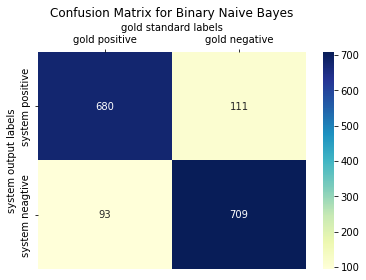

In [ ]:
#for better vizualization
import seaborn as sns
import matplotlib.pyplot as plt

sn = sns.heatmap([[680, 111],[ 93, 709]], annot=True, fmt="d", cmap="YlGnBu", xticklabels=["gold positive", "gold negative"], yticklabels=["system positive", "system neagtive"])
sn.set(xlabel='gold standard labels', ylabel='system output labels')
sn.tick_params(right=False, left=True, top=True, bottom=False, labelleft=True, labeltop=True, labelright=False, labelbottom=False)
sn.xaxis.set_label_position("top")
sn.set_title('Confusion Matrix for Binary Naive Bayes')

plt.show()

In [ ]:
sorted(grid_search_binary.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_TfidfVectorizer__min_df',
 'param_TfidfVectorizer__ngram_range',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

### Multi

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for multiclass classification.

grid_search_multi = GridSearchCV(pipeline, param_grid, n_jobs=-1, return_train_score=True, cv=5)
grid_search_multi.fit(inputForPipeline_multi, train_multiclass["label"])


cv_res_multi = grid_search_multi.cv_results_

print("cv results of gridsearchcv: \n")
print(cv_res_multi)
print("\n\n")

# Report the standart deviation of split scores for each hyperparameter group.

print("the standart deviation of split scores for each hyperparameter group:\n")
print(cv_res_multi["std_train_score"])
print("\n\n")


print("the mean of split scores for each hyperparameter group:\n")
print(cv_res_multi["mean_train_score"])
print("\n\n")


# Show the best parameter set for given dataset and hyperparameter space.

print("best parameters on the given dataset and hyperparameter space:\n")
print(grid_search_multi.best_params_)
print("\n\n")

# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #
# Create your pipeline object with the best parameter set.


pipeline_best_params_multi = Pipeline(steps = [("TfidfVectorizer", TfidfVectorizer(min_df= 500, ngram_range = (1,1))), ("DenseTransformer", DenseTransformer()), ("GaussianNB", GaussianNB())])



# Fit your pipeline on training set.

pipeline_best_params_multi.fit(inputForPipeline_multi, train_multiclass["label"])

# Take prediction and report the F1 and Accuracy scores for multiclass classification. Then show the confussion table.


pipeline_result_multi = pipeline_best_params_multi.predict(inputForPipeline_multi_test) #check how should the training data be treted

print("Accuracy score for naive bayes multi classification:", accuracy_score(pipeline_result_multi, test_multiclass["label"]))
print("F1 score for naive bayes multi classification:", f1_score(pipeline_result_multi, test_multiclass["label"], average="macro"))
print("Confusion matrix:")

print(confusion_matrix(pipeline_result_multi, test_multiclass["label"]))



cv results of gridsearchcv: 

{'mean_fit_time': array([1.64640832, 3.99574304, 2.81216826, 5.43698888, 3.16336322,
       7.89201894, 1.40136552, 3.99775643, 2.79060187, 5.62074571,
       3.24827642, 6.63591056, 1.35022249, 3.85703964, 2.77335343,
       5.38307209, 3.1378932 , 6.17932329]), 'std_fit_time': array([0.05858151, 0.0501073 , 0.1097076 , 0.22070035, 0.10847984,
       1.22877318, 0.04051183, 0.09587754, 0.04197788, 0.12258844,
       0.15267231, 0.19590029, 0.08915251, 0.11862303, 0.09300466,
       0.07893235, 0.06730286, 0.78836635]), 'mean_score_time': array([0.48176298, 0.76456914, 0.41645393, 0.62500682, 0.06637239,
       1.09708333, 0.33558173, 0.59535084, 0.35468287, 0.59804554,
       0.        , 0.8126194 , 0.28196001, 0.53834782, 0.        ,
       0.        , 0.        , 0.71808996]), 'std_score_time': array([0.02542766, 0.05035136, 0.05866756, 0.04618756, 0.13274479,
       0.21975633, 0.01629957, 0.04285949, 0.0166204 , 0.03411889,
       0.        , 0.063915

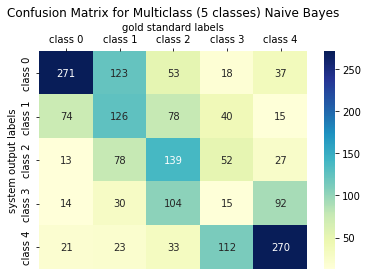

In [ ]:
#for better vizualization
import seaborn as sns
import matplotlib.pyplot as plt
sn = sns.heatmap([[271, 123, 53, 18, 37],[ 74, 126,  78,  40,  15],[ 13 , 78, 139,  52, 27],[ 14,  30, 104, 15, 92],[ 21,  23,  33, 112, 270]], 
                 annot=True, fmt="d", cmap="YlGnBu", xticklabels=["class 0", "class 1", "class 2", "class 3", "class 4"], 
                 yticklabels=["class 0", "class 1", "class 2", "class 3", "class 4"])
sn.set(xlabel='gold standard labels', ylabel='system output labels')
sn.tick_params(right=False, left=True, top=True, bottom=False, labelleft=True, labeltop=True, labelright=False, labelbottom=False)
sn.xaxis.set_label_position("top")
sn.set_title('Confusion Matrix for Multiclass (5 classes) Naive Bayes')

plt.show()

### Logistic Regression

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Initiate the pipeline with required components.You can use Pipeline class of sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# There will be three components; 1) Word weightning 2) Logistic Regression classifier.

pipeline_LR = Pipeline(steps = [("TfidfVectorizer", TfidfVectorizer()), ("LogisticRegression", LogisticRegression(random_state=22, solver="liblinear", multi_class='ovr'))])
pipeline_LR_multi = Pipeline(steps = [("TfidfVectorizer", TfidfVectorizer()),  ("LogisticRegression", LogisticRegression(random_state=22, multi_class='multinomial'))])



#Set the hyperparameter space that will be scanned.

param_grid_lr = {'TfidfVectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3), (1,3)], 'TfidfVectorizer__min_df': [100, 500, 1000], 
                 'LogisticRegression__l1_ratio': [0, 0.5, 1], 'LogisticRegression__solver': ['liblinear', 'saga']} 


In [ ]:
pipeline_LR.get_params()

{'LogisticRegression': LogisticRegression(multi_class='ovr', random_state=22, solver='liblinear'),
 'LogisticRegression__C': 1.0,
 'LogisticRegression__class_weight': None,
 'LogisticRegression__dual': False,
 'LogisticRegression__fit_intercept': True,
 'LogisticRegression__intercept_scaling': 1,
 'LogisticRegression__l1_ratio': None,
 'LogisticRegression__max_iter': 100,
 'LogisticRegression__multi_class': 'ovr',
 'LogisticRegression__n_jobs': None,
 'LogisticRegression__penalty': 'l2',
 'LogisticRegression__random_state': 22,
 'LogisticRegression__solver': 'liblinear',
 'LogisticRegression__tol': 0.0001,
 'LogisticRegression__verbose': 0,
 'LogisticRegression__warm_start': False,
 'TfidfVectorizer': TfidfVectorizer(),
 'TfidfVectorizer__analyzer': 'word',
 'TfidfVectorizer__binary': False,
 'TfidfVectorizer__decode_error': 'strict',
 'TfidfVectorizer__dtype': numpy.float64,
 'TfidfVectorizer__encoding': 'utf-8',
 'TfidfVectorizer__input': 'content',
 'TfidfVectorizer__lowercase': Tru

#### Binary

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for binary classification.


grid_search_lr_binary = GridSearchCV(pipeline_LR, param_grid_lr, n_jobs = -1, return_train_score=True, cv=5)
grid_search_lr_binary.fit(inputForPipeline_binary, train_binary["label"])


cv_res_lr_binary = grid_search_lr_binary.cv_results_
print("cv results of gridsearchcv for LR binary dataset: \n")
print(grid_search_lr_binary.cv_results_)
print("\n\n")
        
# Report the standart deviation of split scores for each hyperparameter group.


print("the standart deviation of split scores for each hyperparameter group:\n")
print(cv_res_lr_binary["std_train_score"])
print("\n\n")


print("the mean of split scores for each hyperparameter group:\n")
print(cv_res_lr_binary["mean_train_score"])
print("\n\n")


# Show the best parameter set for given dataset and hyperparameter space.


print("best parameters on the given dataset and hyperparameter space:\n")
print(grid_search_lr_binary.best_params_)
print("\n\n")



# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #
#Create your pipeline object with the best parameter set.


pipeline_best_params_lr_binary = Pipeline(steps = [("TfidfVectorizer", TfidfVectorizer(min_df= 100, ngram_range = (1,2))), 
                                               ("LogisticRegression",  LogisticRegression(l1_ratio=0, solver="liblinear"))])



#Fit your pipeline on training set.

pipeline_best_params_lr_binary.fit(inputForPipeline_binary, train_binary["label"])

# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.


pipeline_result_lr_binary = pipeline_best_params_lr_binary.predict(inputForPipeline_binary_test) #check how should the training data be treted

print("Accuracy score for binary logistic regrrssion:", accuracy_score(pipeline_result_lr_binary, test_binary["label"]))
print("F1 score for binary logistic regression:", f1_score(pipeline_result_lr_binary, test_binary["label"], average="macro"))
print("Confusion matrix:")

print(confusion_matrix(pipeline_result_lr_binary, test_binary["label"]))


cv results of gridsearchcv for LR binary dataset: 

{'mean_fit_time': array([1.19877315, 3.09721375, 2.2434464 , 4.39334221, 2.43715901,
       5.65039225, 1.83619194, 5.06672049, 2.24188085, 4.4264194 ,
       2.5257504 , 5.10617285, 1.04741311, 2.93593459, 2.31808887,
       4.64820156, 2.61058669, 5.17749872, 1.3181046 , 3.26243863,
       2.34938722, 5.01456671, 2.45547256, 5.43201337, 1.25259299,
       3.13568001, 2.23674192, 4.35531998, 2.48895102, 5.25952229,
       1.09067206, 2.97885623, 2.20503035, 4.23421154, 2.46347361,
       5.1745863 , 1.11323986, 3.12053828, 2.24591813, 4.27863088,
       2.43922153, 5.29186606, 1.11159983, 3.00396557, 2.20977392,
       4.31953807, 2.4663208 , 5.03527923, 1.04475174, 2.94790869,
       2.25367637, 4.3469058 , 2.47590032, 5.03890624, 1.29773755,
       3.246034  , 2.29429474, 4.36969118, 2.39369731, 5.33454895,
       1.26179938, 3.44316154, 2.30918279, 4.43372416, 2.50334349,
       5.3775671 , 1.1230772 , 3.02273569, 2.20111136, 4.31

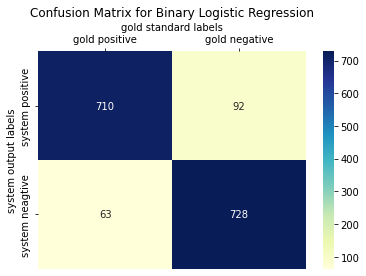

In [ ]:



#for better vizualization
import seaborn as sns
import matplotlib.pyplot as plt

sn = sns.heatmap([[710, 92],[ 63, 728]], annot=True, fmt="d", cmap="YlGnBu", xticklabels=["gold positive", "gold negative"], yticklabels=["system positive", "system neagtive"])
sn.set(xlabel='gold standard labels', ylabel='system output labels')
sn.tick_params(right=False, left=True, top=True, bottom=False, labelleft=True, labeltop=True, labelright=False, labelbottom=False)
sn.xaxis.set_label_position("top")
sn.set_title('Confusion Matrix for Binary Logistic Regression')

plt.show()


#### Multiclass

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for multiclass classification.

grid_search_lr_multi = GridSearchCV(pipeline_LR_multi, param_grid_lr, n_jobs = -1, return_train_score=True, cv=5)
grid_search_lr_multi.fit(inputForPipeline_multi, train_multiclass["label"])

cv_res_lr_multi = grid_search_lr_binary.cv_results_
print("cv results of gridsearchcv for LR binary dataset: \n")
print(grid_search_lr_multi.cv_results_)
print("\n\n")
        

# Report the standart deviation of split scores for each hyperparameter group.

print("the standart deviation of split scores for each hyperparameter group:\n")
print(cv_res_lr_multi["std_train_score"])
print("\n\n")


print("the mean of split scores for each hyperparameter group:\n")
print(cv_res_lr_binary["mean_train_score"])
print("\n\n")


# Show the best parameter set for given dataset and hyperparameter space.


print("best parameters on the given dataset and hyperparameter space:\n")
print(grid_search_lr_multi.best_params_)
print("\n\n")


# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #
# Create your pipeline object with the best parameter set.

pipeline_best_params_multi_lr = Pipeline(steps = [("TfidfVectorizer", TfidfVectorizer(min_df= 100, ngram_range = (1,3))), 
                                                  ("LogisticRegression", LogisticRegression(random_state=22, multi_class='multinomial', solver="saga"))])


# Fit your pipeline on training set.

pipeline_best_params_multi_lr.fit(inputForPipeline_multi, train_multiclass["label"])


# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.

pipeline_result_lr_multi = pipeline_best_params_multi_lr.predict(inputForPipeline_multi_test) #check how should the training data be treted

print("Accuracy score for binary logistic regrrssion:", accuracy_score(pipeline_result_lr_multi, test_multiclass["label"]))
print("F1 score for binary logistic regression:", f1_score(pipeline_result_lr_multi, test_multiclass["label"], average="macro"))
print("Confusion matrix:")

print(confusion_matrix(pipeline_result_lr_multi, test_multiclass["label"]))



cv results of gridsearchcv for LR binary dataset: 

{'mean_fit_time': array([1.37531257, 3.62736502, 2.78336535, 5.4448287 , 3.1879262 ,
       6.37483139, 1.20183969, 3.69007831, 2.83397303, 5.44492278,
       3.10833497, 6.32564545, 1.22313199, 3.66018748, 2.81944814,
       5.32816091, 3.14614577, 6.34525766, 2.61432848, 5.0000741 ,
       3.03885293, 5.6587523 , 3.13765659, 7.47227926, 2.20396905,
       4.52850642, 2.83447165, 5.60759783, 3.16120882, 7.11618347,
       1.88497109, 4.37819858, 2.80389881, 5.33001776, 3.07388339,
       7.07817159, 1.24396701, 3.59559684, 2.73832564, 5.16239405,
       3.11509104, 6.4073874 , 1.20131612, 3.52277746, 2.69078422,
       5.30434055, 3.09029045, 6.15142183, 1.19581094, 3.51350217,
       2.65052867, 5.35172176, 3.07869673, 6.1357049 , 2.52160292,
       4.99458227, 3.0864048 , 5.65449648, 3.18647556, 9.45443001,
       2.09713378, 4.53903179, 2.91563077, 5.57544026, 3.14823875,
       7.23026714, 1.85246596, 4.14419112, 2.65689754, 5.23

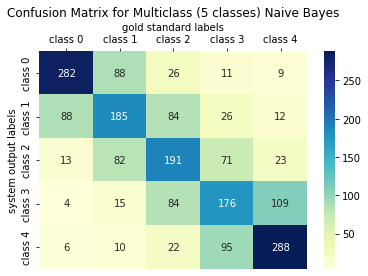

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
sn = sns.heatmap([[282, 88, 26, 11, 9],[ 88, 185,  84,  26,  12],[ 13 , 82, 191,  71, 23],[ 4,  15, 84, 176, 109],[ 6,  10,  22, 95, 288]], 
                 annot=True, fmt="d", cmap="YlGnBu", xticklabels=["class 0", "class 1", "class 2", "class 3", "class 4"], 
                 yticklabels=["class 0", "class 1", "class 2", "class 3", "class 4"])
sn.set(xlabel='gold standard labels', ylabel='system output labels')
sn.tick_params(right=False, left=True, top=True, bottom=False, labelleft=True, labeltop=True, labelright=False, labelbottom=False)
sn.xaxis.set_label_position("top")
sn.set_title('Confusion Matrix for Multiclass (5 classes) Naive Bayes')

plt.show()



In [ ]:
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def AppendList(lst, text):
  lst = []
  word = ""
  count = 0
  for c in str(text):
    if c == " ":
      if word != "":
        lst.append(word)
      word = ""
    else:
      word += c
  return lst

In [ ]:
# Create a validation set from train set
# Please use random_state of 22 and test_size of 0.1

train_binary_with_list = train_binary.copy()
train_multiclass_with_list = train_multiclass.copy()

test_binary_with_list = test_binary.copy()
test_multiclass_with_list = test_multiclass.copy()

train_binary_with_list["listOfWords"] = [[] for i in train_binary_with_list.index]
train_multiclass_with_list["listOfWords"] = [[] for i in train_multiclass_with_list.index]
test_binary_with_list["listOfWords"] = [[] for i in test_binary_with_list.index]
test_multiclass_with_list["listOfWords"] = [[] for i in test_multiclass_with_list.index]



for i in range(0, len(train_binary_with_list)):
  train_binary_with_list["listOfWords"][i] = AppendList(train_binary_with_list["listOfWords"][i], train_binary_with_list["text"][i])

for i in range(0, len(train_multiclass_with_list)):
  train_multiclass_with_list["listOfWords"][i] = AppendList(train_multiclass_with_list["listOfWords"][i], train_multiclass_with_list["text"][i])

for i in range(0, len(test_binary_with_list)):
  test_binary_with_list["listOfWords"][i] = AppendList(test_binary_with_list["listOfWords"][i], test_binary_with_list["text"][i])

for i in range(0, len(test_multiclass_with_list)):
  test_multiclass_with_list["listOfWords"][i] = AppendList(test_multiclass_with_list["listOfWords"][i], test_multiclass_with_list["text"][i])









In [ ]:
#using train_binary_with_list to get all the distinct words
#some information

distinct_words = []



for i in range(0, len(train_binary_with_list)):
  for j in train_binary_with_list["listOfWords"][i]:
    if j not in distinct_words:
      
      distinct_words.append(j)

print("number of distinct words in binary labeled dataframe: " + str(len(distinct_words)))


print("\n")

distinct_words_m = []



for i in range(0, len(train_multiclass_with_list)):
  for j in train_multiclass_with_list["listOfWords"][i]:
    if j not in distinct_words_m:
      
      distinct_words_m.append(j)

print("number of distinct words in multiclass labeled dataframe: " + str(len(distinct_words_m)))

number of distinct words in binary labeled dataframe: 30671


number of distinct words in multiclass labeled dataframe: 35814


In [ ]:
from collections import Counter

def most_freq_10_words(lst):
  return Counter(lst).most_common(10)


list_of = []
for i in range(0, len(train_multiclass_with_list)):
  for j in train_multiclass_with_list["listOfWords"][i]:
    list_of.append(j)

print("most frequent words in multiclass dataset:")
print(most_freq_10_words(list_of))

print("\n")


list_of2 = []
for i in range(0, len(train_binary_with_list)):
  for j in train_binary_with_list["listOfWords"][i]:
    list_of2.append(j)

print("most frequent words in binary dataset:")
print(most_freq_10_words(list_of2))


most frequent words in multiclass dataset:
[('food', 10897), ('place', 9822), ('good', 9734), ('order', 8021), ('like', 7564), ('time', 7519), ('get', 7157), ('go', 6940), ('great', 6521), ('servic', 6254)]


most frequent words in binary dataset:
[('food', 8479), ('place', 7737), ('good', 6879), ('order', 6341), ('time', 6024), ('like', 5737), ('get', 5704), ('go', 5562), ('great', 5281), ('servic', 4956)]


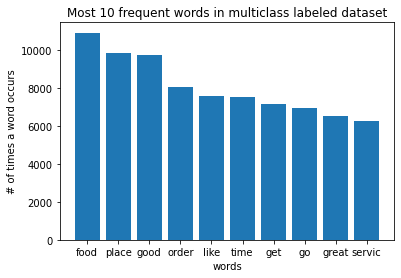

In [ ]:
words =  []
freqs =  []

words = ['food', 'place', 'good', 'order', 'like', 'time', 'get', 'go', 'great', 'servic']


freqs = [10897, 9822, 9734, 8021, 7564, 7519, 7157, 6940, 6521, 6254]


plt.bar(words, freqs)
plt.xlabel("words")
plt.ylabel("# of times a word occurs")
plt.title("Most 10 frequent words in multiclass labeled dataset")
plt.show()

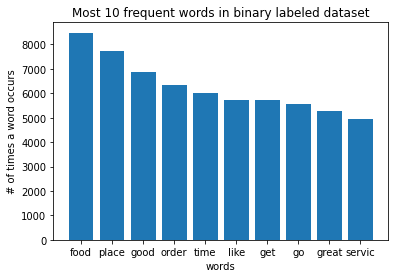

In [ ]:
xAxis = ["food", "place", "good", "order", "time", "like", "get", "go", "great", "servic"]
yAxis = [8479, 7737, 6879, 6341, 6024, 5737, 5704, 5562, 5281, 4956] 
plt.bar(xAxis, yAxis)
plt.xlabel("words")
plt.ylabel("# of times a word occurs")
plt.title("Most 10 frequent words in binary labeled dataset")
plt.show()

In [ ]:
#longest list of words in listOfWords:

print(train_binary_with_list["listOfWords"].max(), "\n", "longest number of words in a row in the dataframe:",len(train_binary_with_list["listOfWords"].max()))
print("\n")




print(train_multiclass_with_list["listOfWords"].max(), "\n", "longest number of words in a row in the multiclass dataframe:",len(train_multiclass_with_list["listOfWords"].max()))
print("\n")



['zydeco', 'sever', 'time', 'last', 'four', 'year', 'experi', 'slow', 'declin', 'point', 'returnon', 'visit', 'recent', 'one', 'discov', 'gotten', 'rid', 'realli', 'awesom', 'nightli', 'special', 'replac', 'fri', 'buffet', 'item', 'fri', 'primarili', 'case', 'bad', 'idea', 'seem', 'price', 'children', 'gave', 'shot', 'wasnt', 'bad', 'still', 'found', 'price', 'rather', 'steepthi', 'recent', 'visit', 'discov', 'price', 'gone', 'still', 'will', 'give', 'chanc', 'got', 'seat', 'order', 'drink', 'three', 'buffet', 'along', 'one', 'dozen', 'chargril', 'oyster', 'buffetaft', 'receiv', 'drink', 'start', 'buffet', 'husband', 'remind', 'waitress', 'salad', 'includ', 'buffet', 'brought', 'near', 'end', 'first', 'round', 'fri', 'food', 'half', 'dozen', 'oyster', 'arriv', 'terribl', 'anxiou', 'wait', 'anoth', 'minut', 'rest', 'oyster', 'say', 'anyth', 'itth', 'buffet', 'would', 'seem', 'food', 'quit', 'time', 'restaur', 'crowd', 'understood', 'might', 'item', 'need', 'refresh', 'nearli', 'food', '

## My Report

**First, I started with the preprocessing.**
**I removed the stopwords with using stopwords from nltk.corpus.
I also checked for punctuations and removed them if they are adjacent to the word or in the word.**
</br></br>
**As a stemmer, i used PorterStemmer. I also tried SnowballStemmer but PorterStemmer gave slightly better results than SnowballStemmer in naive bayes part so I continued to use the PorterStemmer.**
</br></br>
*(I believe that in SnowballStemmer, there might be more versions of words but PorterStemmer might threat 2 different words with the same root as the same when SnowballStemmer doesn't so beacuse of this increased variety, there might be more to classify so accuracies might have been fallen down.)*
</br></br>
**I dropped the rows if they have missing info (like NaN, etc.) before applying the preprocessing.**
</br></br>
**I created 2 functions for arranging the label column. (For binary, 1 and 2 goes to label 0, rows with labe 3 are removed, and 4 and 5 goes to label 1.)(For multiclass, 1 goes to label 0, 2 goes to 1, 3 goes to 2, 4 goes to 3, 5 goes to 4.)**
</br></br></br>
**<h2>Naive Bayes</h2>**

**For the naive bayes part, I used the 3 parametered pipeline as indicated in the project document: TfidfVectorizer, DenseTransformer and GaussianNB.** 
</br></br>
**I set the parameter grid as:**

param_grid = {'TfidfVectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3), (1,3)], 'TfidfVectorizer__min_df': [100, 500, 1000]}
</br>
**Then I used this pipeline in GridSearchCV to get the best parameter set.**
</br></br></br></br>
**For the binary dataset:**
</br>
**I got the best parameter space as: bigrams and unigrams together, min. word occurence as 100 times.**
</br>
**For this parameter group, I found accuracy score as 0.871939736346516</br>I found F1 score as 0.8718972819385621</br>
It took this cell to run approximately 4 mins.**
</br></br>
**Confusion matrix is as follows:**</br>
true positive: &nbsp;&nbsp;&nbsp;680&nbsp;&nbsp;|&nbsp;&nbsp;false positive: 111</br>
false negative: &nbsp;&nbsp;93&nbsp;&nbsp;|&nbsp;&nbsp;
true negative: &nbsp;709</br></br></br></br>
**For the 5 classed dataset:**
</br></br>
**I got the best parameter space as: bigrams only, min. word occurence as 500 times.**
</br>
**For this parameter group, I found accuracy score as 0.4815</br>I found F1 score as 0.47038602179886474</br>
It took this cell to run approximately 5 mins.**
</br></br>
**(I believe something is wrong with my preprocessed data because this accuracy score is not reasonable. It is too low.)**
</br></br>
**Confusion matrix is as follows:**</br>
[[271 123  53  18  37]</br>
 [ 74 126  78  40  15]</br>
 [ 13  78 139  52  27]</br>
 [ 14  30 104 157  92]</br>
 [ 21  23  33 112 270]]</br></br>
**[i][i]th (for i in [0, ... , 4]) elements in the matrix are true outputs and others are false outputs.**
</br></br>
**As a conclusion, naive bayes works better on binary labeled datasets.**
</br></br></br></br>
**<h2>Logistic Regression</h2>**
</br>
**I used this parameters in grid search:**
</br>
param_grid_lr = {'TfidfVectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3), (1,3)], 'TfidfVectorizer__min_df': [100, 500, 1000], 
                 'LogisticRegression__l1_ratio': [0, 0.5, 1], 'LogisticRegression__solver': ['liblinear', 'saga']} 
</br></br>

**For the binary part, I found the best parameters as:**{'LogisticRegression__l1_ratio': 0, 'LogisticRegression__solver': 'liblinear', 'TfidfVectorizer__min_df': 100, 'TfidfVectorizer__ngram_range': (1, 2)}
(unigrams and bigrams, min word occurence as 100 times)
</br></br>
**Accuracy score: 0.9026993094789705</br>**
**F1 score: 0.9026868848097898</br></br>**
**Confusion matrix:</br>**
true positive: &nbsp;&nbsp;&nbsp;710&nbsp;&nbsp;|&nbsp;&nbsp;false positive: 92</br>
false negative: &nbsp;&nbsp;63&nbsp;&nbsp;|&nbsp;&nbsp;
true negative:&nbsp;728</br>
**Approximately 21 mins to run this cell.</br></br></br>**
**For the multi part, I found best parameter as: </br>**
{'LogisticRegression__l1_ratio': 0, 'LogisticRegression__solver': 'saga', 'TfidfVectorizer__min_df': 100, 'TfidfVectorizer__ngram_range': (1, 3)}
(min word occuracy as 100, unigrams, bigrams and trigrams used together)</br></br>
**Accuracy score: 0.561</br>**
**F1 score: 0.5574216486208443</br></br>**
**Confusion matrix:</br>**
[[282  88  26  11   9]</br>
 [ 88 185  84  26  12]</br>
 [ 13  82 191  71  23]</br>
 [  4  15  84 176 109]</br>
 [  6  10  22  95 288]]</br></br>
 **Approximately running time: 24 mins</br></br>**
 **I believe that the acuuracy scores fot multiclass logistic regression are also wrong, it might be due to opeartions that I use on the datasets.</br></br>**
 **If we compare binary logistic regression and binary naive bayes, logistic regression works better on binary.</br>**
 **If we compare multiclass logistic regression and multiclass naive bayes, logistic regression wins again.</br>**
 **So we can say that logistic regression is better for text classification for this dataset and in general if there is a similar giving points system (like giving 5 stars, 1 star, etc.)**
**Logistic regression is better but it is very slow compared to naive bayes.</br></br>So I think naive bayes shoul be the choice if the other alternative is logistic regression (to save from time and space).**

 </br></br>

**<h2>Sources that I have used for this project:</h2>**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer


https://scikit-learn.org/stable/modules/grid_search.html


https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics


https://seaborn.pydata.org/generated/seaborn.heatmap.html


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score


https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


https://matplotlib.org/3.1.1/api/axis_api.html